# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# importing libraries that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# project files uploaded to google drive
# importing google.colab library and mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
# updating data path to my drive location
df = pd.read_csv('/content/drive/MyDrive/MIT/Foundations - Python and Stats/project/foodhub_order.csv')

# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
# call the shape method to return the number of columns and rows
df.shape

# assign the values to variables
rows = df.shape[0]
columns = df.shape[1]

# passing the rows and columns variables to string literal to view
print(f"There are {rows} rows and {columns} columns present in the data")

There are 1898 rows and 9 columns present in the data


#### Observations:
There are 1898 rows and 9 columns present in the data

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

# we can see we have 3 different data types
# 1 float, 4 int, and 4 object types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

We can see we have 3 different data types:
1 float, 4 int, and 4 object types


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:

# using the is null method to check for any nulls, and summing up the values
df.isnull().sum()



,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0



#### Observations:
There are not any missing values in the data set.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here

# using the mean, min, and max methods from the pandas library
# added rounding for consistent format
average = round(df['food_preparation_time'].mean())
min = round(df['food_preparation_time'].min())
max = round(df['food_preparation_time'].max())

print(f"The average food prep time is {average} minutes, the minimum time {min} minutes and the maximum time {max} minutes ")

The average food prep time is 27 minutes, the minimum time 20 minutes and the maximum time 35 minutes 


#### Observations:

The average food prep time is 27 minutes, the minimum time 20 minutes and the maximum time 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# accessing rating in data frame, using value_counts method to group
df['rating'].value_counts()


,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
There are 736 orders that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

**bold text**### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# we already checked for nulls
# checking for unique values to see if there are any duplicate orders
# since we have 1898 rows, and return 1898 unique ids we are good here
df['order_id'].nunique()


1898

#### Customer ID

In [ ]:
# same as Order ID, checking the unique customer totals
# the data set is representative of 1200 total customers
df['customer_id'].nunique()


1200

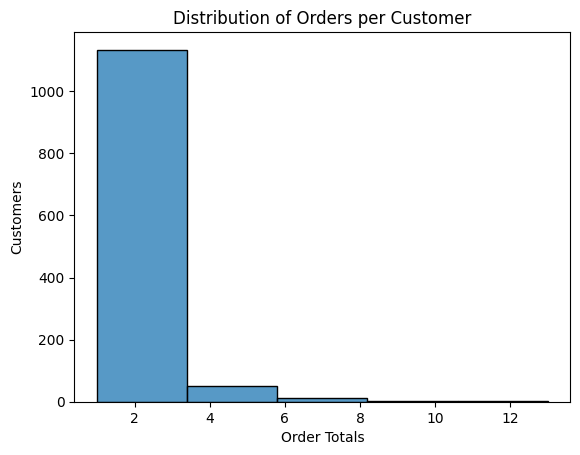

In [ ]:
# looking at the distrbution of orders over customers
# Count orders per customer
orders_per_customer = df.groupby('customer_id')['order_id'].count()

# Histogram to show distrbution
sns.histplot(orders_per_customer, bins=5, kde=False)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Order Totals')
plt.ylabel('Customers')
plt.show()

# majority of repeat customers have 2 orders

#### Restarant Name

In [ ]:
#check to see the number of unique restaurants in the data set
df['restaurant_name'].nunique()

178

#### Cuisine Type

In [ ]:
# check for unique cuisine types
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

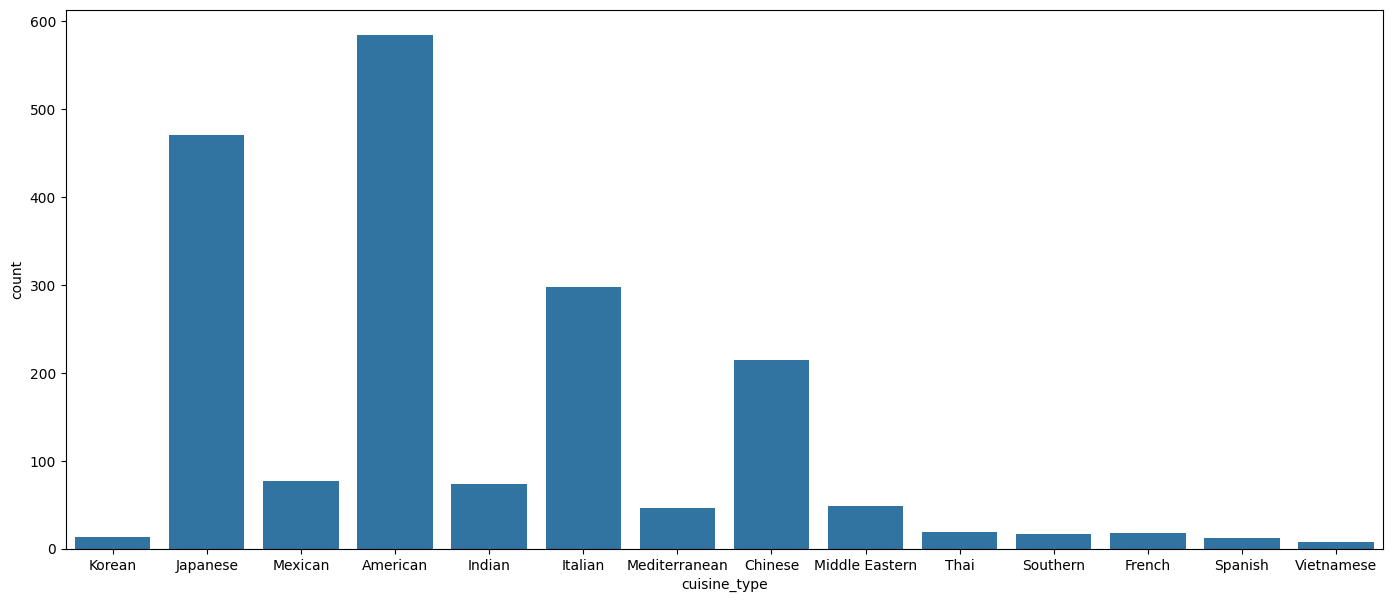

In [ ]:
# showing the order totals by cusiting type
plt.figure(figsize = (17,7))
sns.countplot(data = df, x = 'cuisine_type')

#### Cost of the order

In [ ]:
# looking at order cost details
df['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


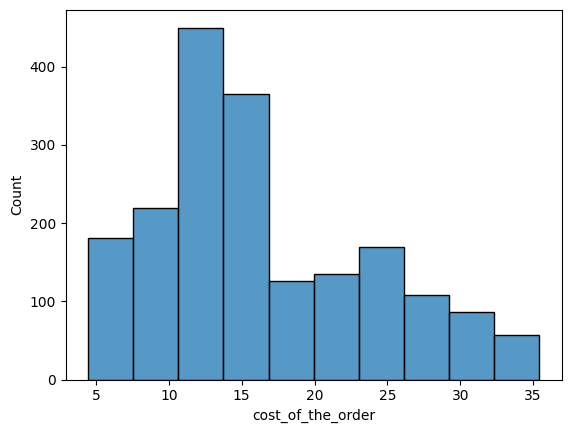

In [ ]:
# creating a histogram for the cost of the orders
sns.histplot(data=df, x='cost_of_the_order', bins=10)
plt.show()

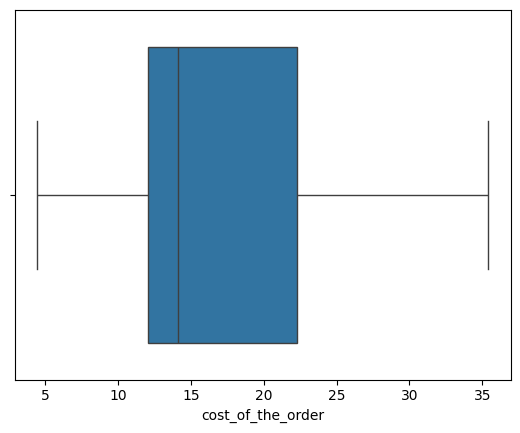

In [ ]:
# creating box plot for the order, no major outliers in the data
sns.boxplot(data=df, x= 'cost_of_the_order')
plt.show()

#### Day of the Week

In [ ]:
# checking to see unique values in day of week
df['day_of_the_week'].nunique()

2

In [ ]:
# looking to see day of the week counts
df['day_of_the_week'].value_counts()

,count
day_of_the_week,
Weekend,1351
Weekday,547


<Axes: xlabel='day_of_the_week', ylabel='count'>

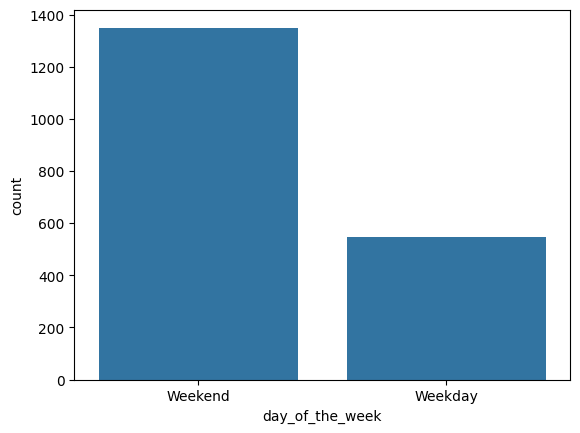

In [ ]:
# plot counts
sns.countplot(data=df, x='day_of_the_week')

#### Rating

In [ ]:
# chevking the unique rating scale values
df['rating'].nunique()

4

In [ ]:
# decribe method for rating
# appears we have more than int values here
df['rating'].describe()

,rating
count,1898
unique,4
top,Not given
freq,736


In [ ]:
# looking at rating
df['rating'].value_counts()


,count
rating,
Not given,736
5,588
4,386
3,188


<Axes: xlabel='rating', ylabel='count'>

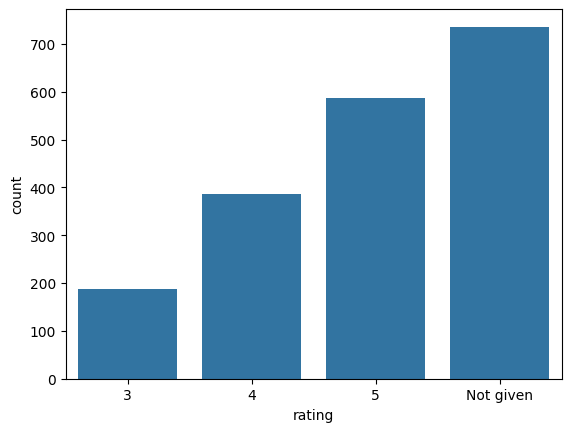

In [ ]:
sns.countplot(data=df, x='rating', order=['3', '4', '5', 'Not given'])

# Not Given ratings is very high

#### Delivery Time

In [ ]:
# describe of delivery time
df['delivery_time'].describe()

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


<Axes: xlabel='delivery_time'>

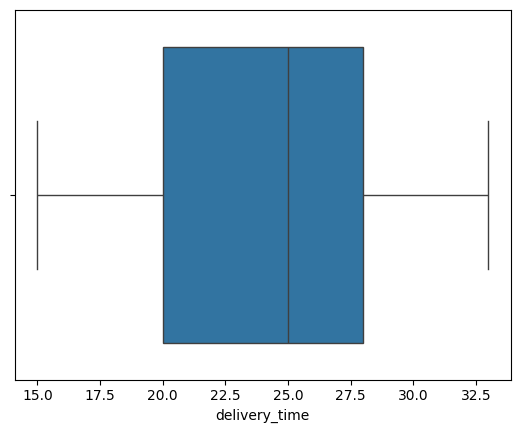

In [ ]:
# plotting delivery box plot
sns.boxplot(data=df, x='delivery_time')

<Axes: xlabel='delivery_time', ylabel='Count'>

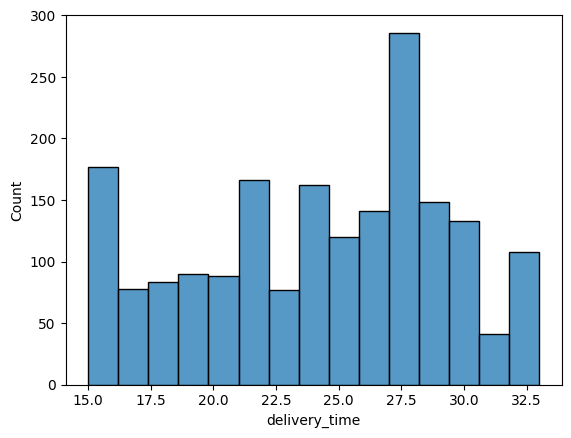

In [ ]:
# histogram of delivery time
sns.histplot(data=df, x='delivery_time', bins=15)

# wide range of dilvery times, with the longest almost as likley as the shortest durations

#### Food Prep Time

In [ ]:
# describe of food prep time
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


<Axes: xlabel='food_preparation_time'>

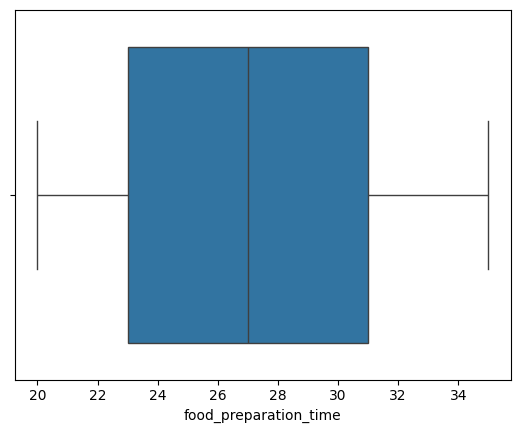

In [ ]:
# plotting delivery box plot
sns.boxplot(data=df, x='food_preparation_time')

<Axes: xlabel='food_preparation_time', ylabel='Count'>

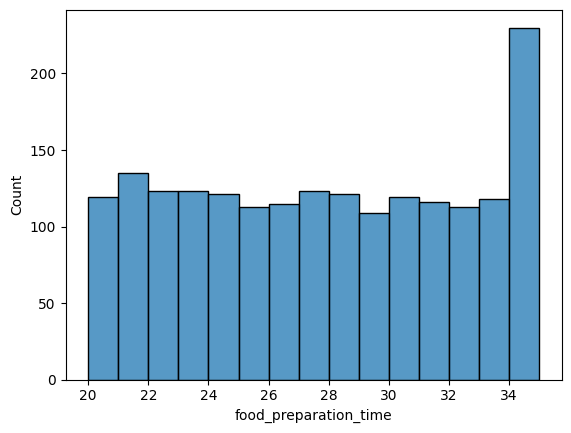

In [ ]:
# histogram of delivery time
sns.histplot(data=df, x='food_preparation_time', bins=15)

#significant amoutn of perp time > 34 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df['restaurant_name'].value_counts()

# get the totals for orders received by restaurant
# use the group by method to get the totals of unique orders, we know they are
# unique from above but can be re-used if data changed.
unique = df.groupby('restaurant_name')['order_id'].nunique()

# use the head method to get the top 5 and display
unique.sort_values(ascending=False).head(5)



,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

The top five restaurants are:

Shake Shack
The Meatball Shop
Blue Ribbon Sushi
Blue Ribbon Fried Chicken
Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# filter into new df for weekend only
df_we = df[df['day_of_the_week'] == 'Weekend']

# checking to see the unique counts
unique = df_we.groupby('cuisine_type')['order_id'].nunique()

# use the head method to get the top 1 and display
unique.sort_values(ascending=False).head(1)




,order_id
cuisine_type,
American,415


#### Observations:
American cuisine has the highest demand

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# filter to a df where only shows greater than 20 dollar orders
df_twenty = df[df['cost_of_the_order']>20]

#create variables to store values for percentage calc
orders_greater_twenty = df_twenty.shape[0]
total_orders = df.shape[0]
final = round(orders_greater_twenty/total_orders * 100 ,2)

# pass the final output to a print statement
print(f"{final} percent of the orders cost more than $20 dollars")

29.24 percent of the orders cost more than $20 dollars


#### Observations:

29.24 percent of the orders cost more than $20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# creating varible to store mean delivery time
mean_deliver_time = round(df['delivery_time'].mean())

print(f"The mean order delivery time is {mean_deliver_time} minutes")

The mean order delivery time is 24 minutes


#### Observations:

Average deliver time = 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the unique counts
unique_orders = df.groupby('customer_id')['order_id'].nunique()

# sort the counts and display the top 3
top_three = unique_orders.sort_values(ascending=False).head(3)

print(f"Top 3 Customers with the Most Unique Orders: {top_three}")

Top 3 Customers with the Most Unique Orders: customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:

Top 3 customers:

52832, 47440, 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### High Level variable analysis

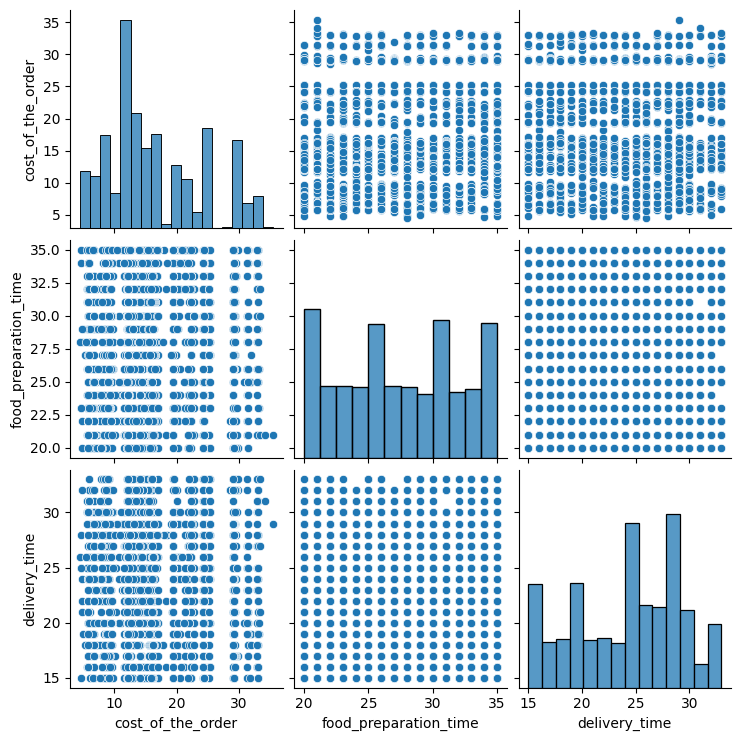

In [ ]:
# look at sns pair plot between the variables
# filter out columns with no use ids, and conflicting data type columns

cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.pairplot(data=df[cols])
plt.show()

In [ ]:
# column correlation
df[cols].corr()

# variables not heavily correlated


,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


<Axes: >

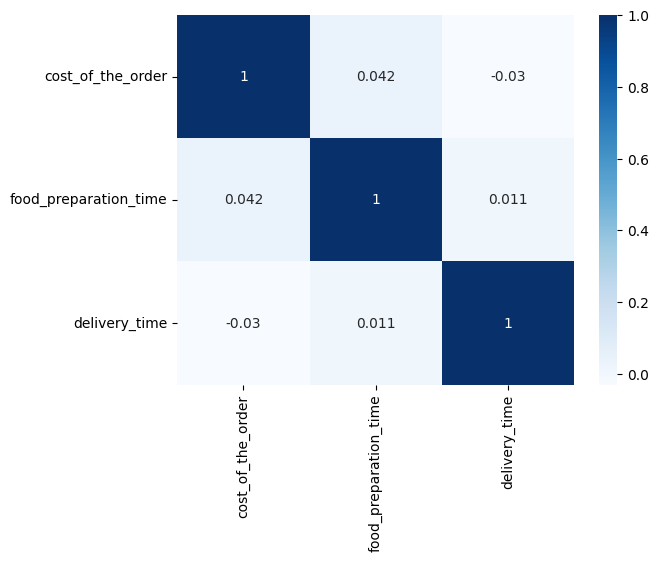

In [ ]:
# heatmap of correlations - start here to pick which same data type variables we can compare for +/- corr
sns.heatmap(data=df[cols].corr(), annot=True, cmap="Blues")

# variables not heavily correlated

#### Cuisine vs Prep Time
##### Do certain foods taken longer to prepare

<ipython-input-269-9d26fcdd26d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'cuisine_type', y = 'food_preparation_time', palette = 'colorblind')


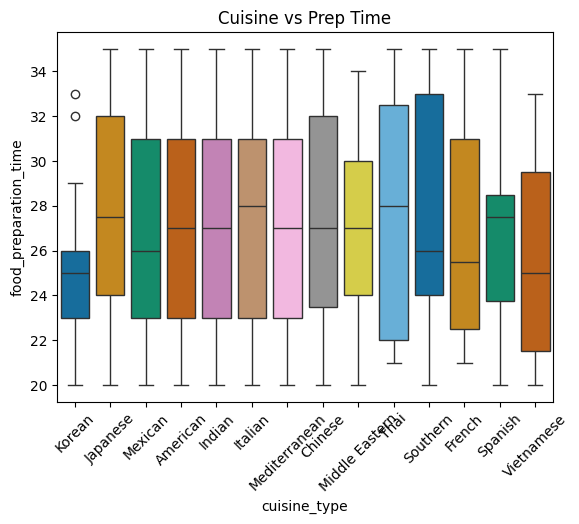

In [ ]:
# create box plot to show relationship between cuisine type and prep time
sns.boxplot(data=df, x = 'cuisine_type', y = 'food_preparation_time', palette = 'colorblind')

# clean up visual
plt.xticks(rotation= 45)
plt.title("Cuisine vs Prep Time")

#show the plot
plt.show()


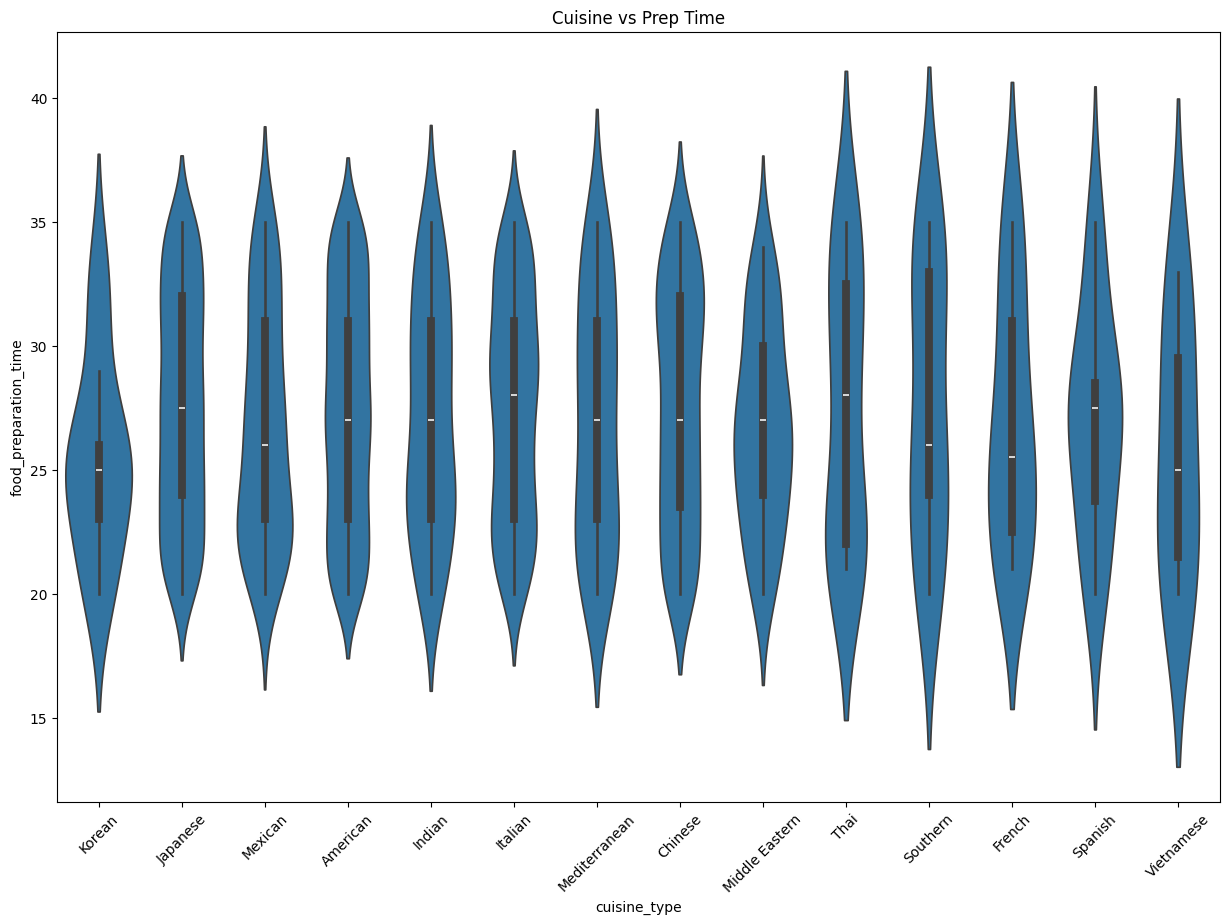

In [ ]:
# adjust the plot size
plt.figure(figsize=(15,10))

# create violin plot for cuisine type vs. prep time
sns.violinplot(data=df, x = 'cuisine_type', y = 'food_preparation_time')

# clean up the visuals
plt.xticks(rotation= 45)
plt.title("Cuisine vs Prep Time")

plt.show()

#### Cuisinse vs Cost
##### what foods cost the most

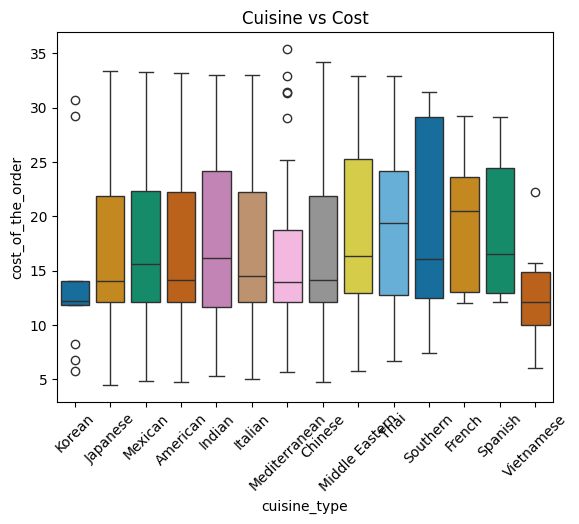

In [ ]:
# create box plot to show relationship between cuisine type and cost
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', palette='colorblind')

# clean up visual
plt.xticks(rotation= 45)
plt.title("Cuisine vs Cost")

#show the plot
plt.show()

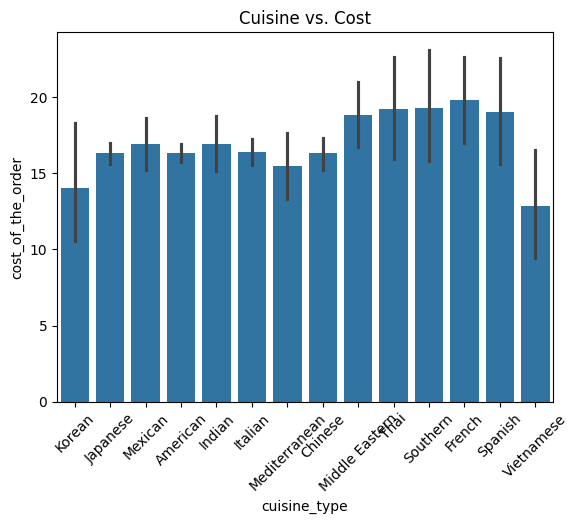

In [ ]:
# create bar plot to see the standard deviation of the costs of the order
sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order')

# clean up and dispaly the plot
plt.xticks(rotation=45)
plt.title("Cuisine vs. Cost")
plt.show()

#### Top 10 Restaurants by Earnings

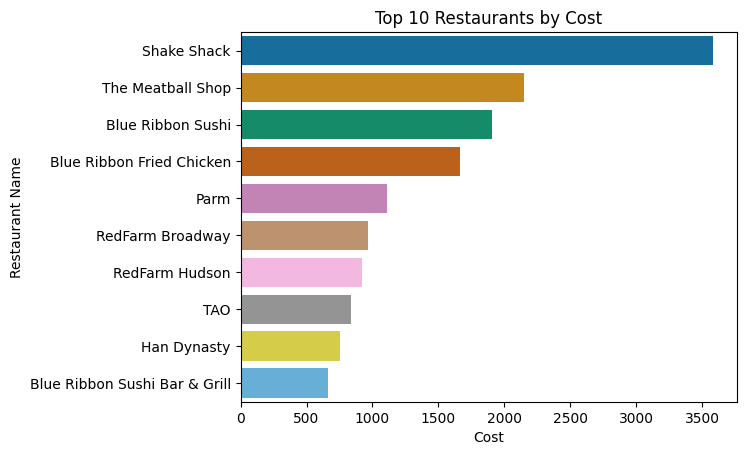

In [ ]:
# Sum the costs by restaurant
restaurant_costs = df.groupby('restaurant_name')['cost_of_the_order'].sum()

# Sort by total cost and filter top 10
top_ten_restaurants = restaurant_costs.sort_values(ascending=False).head(10)

# Convert Series back to df for visualization
top_ten_restaurants = top_ten_restaurants.reset_index()

# Visualize with a bar plot
sns.barplot(x='cost_of_the_order', y='restaurant_name', data=top_ten_restaurants, hue= 'restaurant_name', palette='colorblind')
plt.title("Top 10 Restaurants by Cost")
plt.xlabel("Cost")
plt.ylabel("Restaurant Name")
plt.show()

# Shake Shack is dominating order sales by almost 30% compared to the second leading restaurant

#### Day of the Week vs. Delivery Time

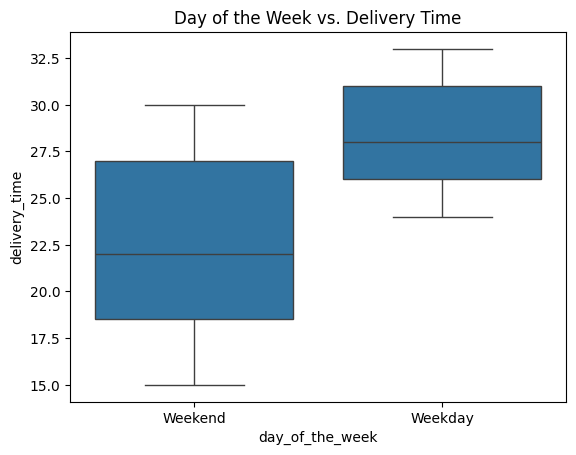

In [ ]:
# create a boxplot to anlayze delivery time vs. day of the week
sns.boxplot(data=df, x = 'day_of_the_week', y = 'delivery_time')

plt.title('Day of the Week vs. Delivery Time')
plt.show()

# weekday delivery times are significantly longer

#### Cost vs Day of Week

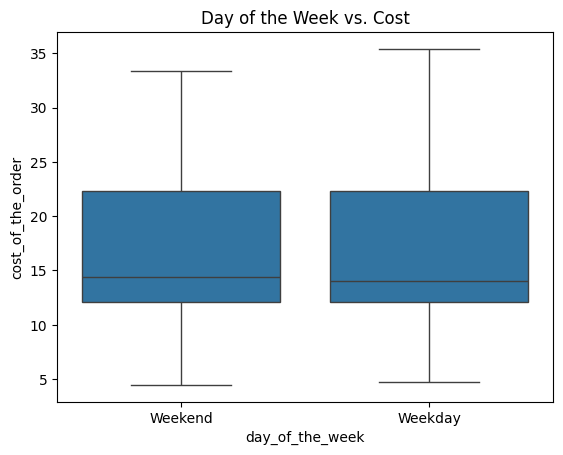

In [ ]:
# create a boxplot to anlayze delivery time vs. day of the week
sns.boxplot(data=df, x = 'day_of_the_week', y = 'cost_of_the_order')

plt.title('Day of the Week vs. Cost')
plt.show()

# the day of the week does not have a major effect on the cost

#### Rating vs Delivery Time

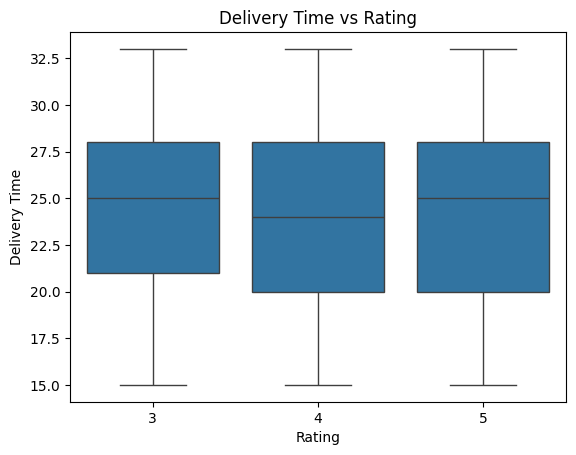

In [ ]:
#create rating df copy
rating_df = df.copy()

# handle the not given ratings by assigning nulls
rating_df['rating'] = rating_df['rating'].replace("Not given", np.nan)

# Box plot to show delivery time distribution for each rating
sns.boxplot(data= rating_df, x='rating', y='delivery_time', order=['3', '4', '5'])

# add titles and labels
plt.title("Delivery Time vs Rating")
plt.xlabel("Rating")
plt.ylabel("Delivery Time")

#show visual
plt.show()

# the rating doees not seem to be overly impacted by the deliver time


#### Cost vs. Rating


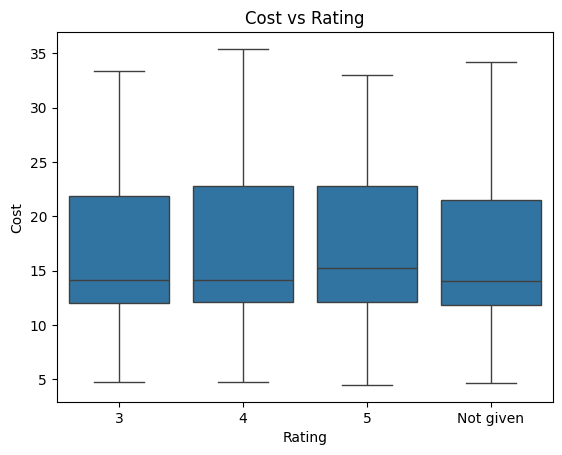

In [ ]:
# create a box plot to show rating vs cost
sns.boxplot(x='rating', y='cost_of_the_order', data=df, order=['3', '4', '5', 'Not given'])

#add labels and show
plt.title("Cost vs Rating")
plt.xlabel("Rating")
plt.ylabel("Cost")
plt.show()

# summary - the rating overall does not seem to be largely impacted by the cost. There is a slight uptick
# for ratings = 5 and the average cost

#### Rating vs Prep Time

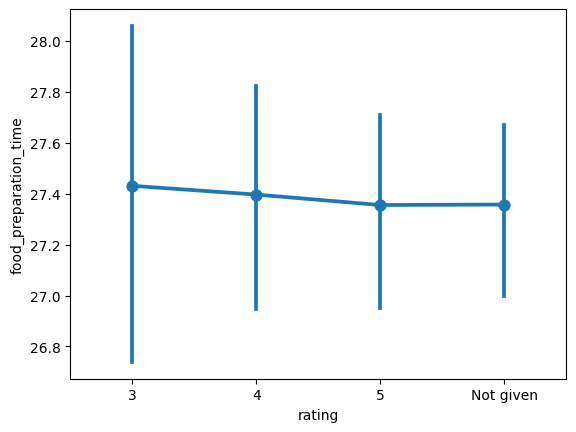

In [ ]:
# Relationship between rating and preperation time
sns.pointplot(data=df, x = 'rating', y = 'food_preparation_time', order=['3', '4', '5', 'Not given'])

plt.show()

# Ratings of 3 indicate a higher variablity in food preparaation time in relation to other ratings

#### Top 10 fastest Restaurants

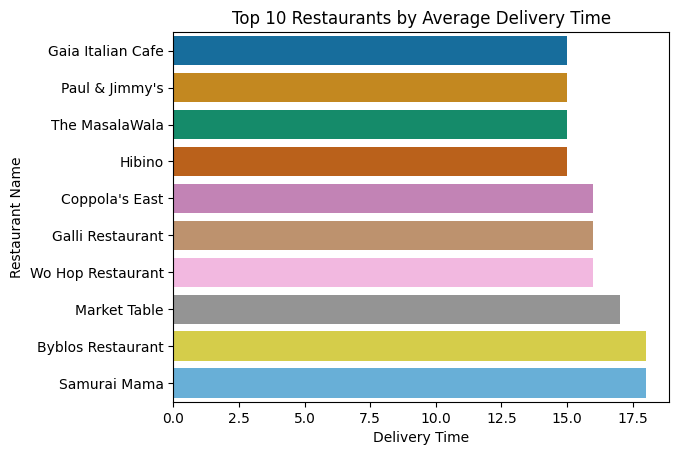

In [ ]:
# Sum the costs by restaurant
delivery_time = df.groupby('restaurant_name')['delivery_time'].mean()

# Sort by total cost and filter top 10
top_ten_restaurants = delivery_time.sort_values(ascending=True).head(10)

# Convert Series back to df for visualization
top_ten_restaurants = top_ten_restaurants.reset_index()

# Visualize with a bar plot
sns.barplot(x='delivery_time', y='restaurant_name', data=top_ten_restaurants, hue = 'restaurant_name', palette='colorblind')
plt.title("Top 10 Restaurants by Average Delivery Time")
plt.xlabel("Delivery Time")
plt.ylabel("Restaurant Name")
plt.show()

# using the avreage here may be misleading as some restaraunts have a much smaller sample of orders

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# create a copy data set without the not given ratings
df_promo = df[df['rating'] != 'Not given'].copy()

#once the not given is removed, we need to conver the rating column to data type to int
df_promo['rating'] = df_promo['rating'].astype('int')

# count all the restaurants ratings
df_ratings = df_promo.groupby('restaurant_name')['rating'].count().sort_values(ascending = False).reset_index()

# Filter for restaurants with count > 50
filtered_restaurants = df_ratings[df_ratings['rating'] > 50]['restaurant_name']
print(filtered_restaurants)

# create another df that will filter down to only the filtered rest
df_four = df_promo[df_promo['restaurant_name'].isin(filtered_restaurants)].copy()

# group the final df by the name and average rating
df_four.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

#The company can offer the promotion to the following four restaurants



0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The restaurants with > 4 rating are:
The Meatball Shop
Blue Ribbon Fried Chicken
Shake Shack
Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# create a function to calculate the revenue
def calculate_revenue(cost):
  if cost > 20:
    return cost * .25
  elif cost > 5:
    return cost * .15
  else:
    return 0

# add the revenue to a column in the data frame
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

#check to see if the new revenue column is working correctly
# df.head()

#get the revenue, format and print the total
net_revenue = df['revenue'].sum()
print(f"The net revenue is ${net_revenue:,.2f}")


The net revenue is $6,166.30


#### Observations:
The net revenue is $6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#need to create a new column in the data frame that will sum the prep and deliver

df['total_time_required'] = df['food_preparation_time'] + df['delivery_time']

# check to see if the changes are as expected
df.head()

# create variables to hold numerator and denominator

total_orders = df.shape[0]
orders_sixty = df[df['total_time_required'] > 60].shape[0]
percentage = orders_sixty/total_orders

print(f"Percentage of orders that take longer than 60 minute delivery: {percentage:.2%}")

Percentage of orders that take longer than 60 minute delivery: 10.54%


#### Observations:
Percentage of orders that take longer than 60 minute delivery: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# create the mean for weekday vs weekend

weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# create variable to hold percentange change
var = ((weekday - weekend)/weekday)

print(f"The Weekday is {var:.2%} difference in delivery time vs. the weekend")



The Weekday is 20.71% difference in delivery time vs. the weekend


#### Observations:

The Weekday is 20.71% increase in delivery time vs. the weekend


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1.  There is significantly more order activity on Weekends than Weekdays
2. Delivery Time takes significantly longer on Weekdays vs. Weekends.
3. Restaurant Revenue and Demand consolidation - The volume of the top 5 restaurants account for > 30% and the top 15 > 50%.
4. The majority of customers frequent about 2 times.
5. The ratings data is very limited/incomplete with > 40% of the ratings not given.
6. Several cuisine types dominate orders demand.









### Recommendations:

1. Customer Marketing Campaigns - Weekday Demand - Create marketing campaigns, discounts, offers, etc that may attract more customers on Weekdays. With the Weekends dominating volume, there is a big opportunity to expand weekday volume.

2. Weekday Inefficiencies - Similar to point 1, the delivery time on Weekdays is much slower. Can we offer increased revenue sharing with our delivery on Weekdays to entice more available deliveries to drive down time. This will feed into a better customer experience and in turn attract more satisfied customers.

3. Ratings Data - the rating data is very incomplete with > 40% ratings not given. Recommend we revisit with the Application Product Managers to look at the UX. If we can get more customers to rate, all parties will have better data to make decisions on. Customers will have better restaurant ratings/higher confidence in ordering. Restaurants will be rewarded according to their ratings. We as the business will have more information to work with around customers and restaurants.

4. Customer Frequency - Customer frequency rarely surpasses 2x. There seems to be an opportunity to reward customers for using the app more frequently. Whether this be rewards points or some sort of program that will reward customers for more orders.

5. Restaurant Demand and Revenue - Volume and revenue is consolidated very tight. The top 5 restaurants account for > 30% of total volume and the top 15 > 50% of volume and carries over to revenue. Recommend two things here. First, we lean into our top performers and ensure these businesses are happy, it's in our best interest to keep them using our app. Secondly there is an opportunity to prospect and work with restaurants that are not seeing as much volume. We can look at customer segmentation breakouts that focus on our top clients vs. our clients that we would like to do more business with.

6. Cuisine Demand - demand for cuisine is dominated by 4 main types, offering discounts and promotions in an effort to increase demand for trailing cuisines.

---